In [70]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

# Reading the audio

In [83]:
hop_length = 512
n_fft = 1024
sr = 22050

y, sr = librosa.load('./labeled_recs_sample/W52753S23867_20200124_081000.wav', sr=sr)
y -= np.mean(y)
y /= np.std(y)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10, n_fft=2048, hop_length=512)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
mel = librosa.power_to_db(mel, ref=np.max)

mel

array([[ -6.56773  ,  -3.032589 ,  -5.451914 , ...,  -3.1788979,
         -3.6448936,  -2.7421646],
       [-13.190247 , -16.761166 , -11.4824295, ..., -22.083593 ,
        -20.18097  , -24.529854 ],
       [-17.635365 , -22.279015 , -15.730262 , ..., -20.667568 ,
        -19.826202 , -24.583588 ],
       ...,
       [-65.58582  , -68.647255 , -68.77418  , ..., -68.254005 ,
        -67.24477  , -65.30863  ],
       [-71.75791  , -80.       , -80.       , ..., -75.47718  ,
        -74.923645 , -71.11052  ],
       [-79.097664 , -80.       , -80.       , ..., -80.       ,
        -80.       , -72.93276  ]], dtype=float32)

# Applying Noise Profiling

### 1 - segmentar
### 2 - usar np.mean para obter as médias (axis=0)
### 4 - subtrair a média na escala mel

In [84]:
saida = []

for offset in range(8):
  frequency_means = np.mean(mel[::,323*offset:323*(offset+1)], axis=1)
  print(frequency_means.shape)
  saida.append(mel[::,323*offset:323*(offset+1)].T-frequency_means)

saida = np.vstack(saida).T
print(saida.shape)

bounds = librosa.segment.agglomerative(saida, 10)
bound_times = librosa.frames_to_time(bounds, sr=sr, n_fft=n_fft, hop_length=hop_length)

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128, 2584)


[Text(0.5, 1.0, 'Power Spectrogram')]

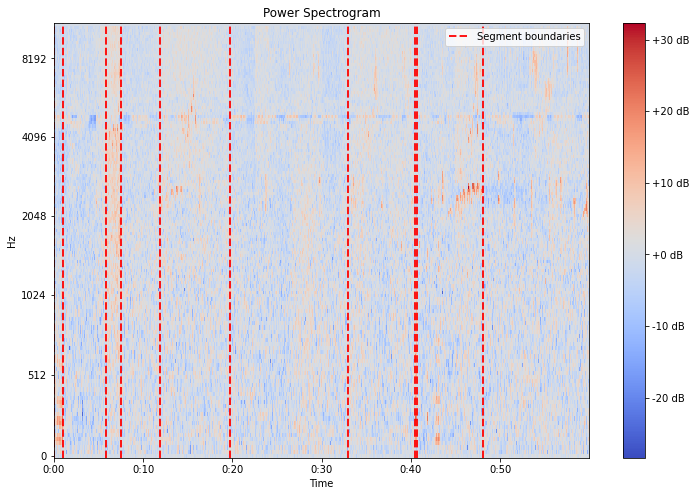

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))
trans = mpt.blended_transform_factory(ax.transData, ax.transAxes)
img = librosa.display.specshow(saida, y_axis='mel', x_axis='time', ax=ax, n_fft=n_fft, hop_length=hop_length, sr=sr)
ax.vlines(bound_times,
          0, 
          1,
          color='red',
          linestyle='--',
          linewidth=2,
          alpha=0.9,
          label='Segment boundaries',
          transform=trans,
         )
ax.legend()
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')